****Coursework 1****

Install Libraries

In [81]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [87]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [88]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [89]:
pip install opencv-contrib-python-headless

Note: you may need to restart the kernel to use updated packages.


In [90]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [91]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


Importing Required Libraries for the Coursework

In [92]:
import sys
assert sys.version_info >= (3,5)

In [93]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [94]:
import pandas as pd

In [95]:
import numpy as np

In [96]:
import scipy.stats as stats

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
from pandas.plotting import scatter_matrix

In [99]:
import time

In [100]:
import cv2

In [164]:
import seaborn as sns

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [104]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB 

In [106]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
from itertools import cycle

Importing all required tables

In [109]:
binary_class_x_train=pd.read_csv('./Traffic_Sign/Binary_Classification/x_train_bin.csv')
binary_class_y_train=pd.read_csv('./Traffic_Sign/Binary_Classification/y_train_bin.csv')
binary_class_x_test=pd.read_csv('./Traffic_Sign/Binary_Classification/x_test_bin.csv')
binary_class_y_test=pd.read_csv('./Traffic_Sign/Binary_Classification/y_test_bin.csv')

complete_x_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_train_all.csv')
complete_y_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_train_all.csv')
complete_x_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_test_all.csv')
complete_y_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_test_all.csv')

onevsall_y_train_0=pd.read_csv('./Traffic_Sign/OnevrsAll/0_vrs_all/y_train_0.csv')
onevsall_y_train_1=pd.read_csv('./Traffic_Sign/OnevrsAll/1_vrs_all/y_train_1.csv')
onevsall_y_train_2=pd.read_csv('./Traffic_Sign/OnevrsAll/2_vrs_all/y_train_2.csv')
onevsall_y_train_3=pd.read_csv('./Traffic_Sign/OnevrsAll/3_vrs_all/y_train_3.csv')
onevsall_y_train_4=pd.read_csv('./Traffic_Sign/OnevrsAll/4_vrs_all/y_train_4.csv')
onevsall_y_train_5=pd.read_csv('./Traffic_Sign/OnevrsAll/5_vrs_all/y_train_5.csv')
onevsall_y_train_6=pd.read_csv('./Traffic_Sign/OnevrsAll/6_vrs_all/y_train_6.csv')
onevsall_y_train_7=pd.read_csv('./Traffic_Sign/OnevrsAll/7_vrs_all/y_train_7.csv')
onevsall_y_train_8=pd.read_csv('./Traffic_Sign/OnevrsAll/8_vrs_all/y_train_8.csv')
onevsall_y_train_9=pd.read_csv('./Traffic_Sign/OnevrsAll/9_vrs_all/y_train_9.csv')

def inverse_num(i):
    if i == 1: return 0
    else: return 1

onevsall_y_train_0 = [[inverse_num(i)] for i in onevsall_y_train_0.copy().to_numpy()]
onevsall_y_train_1 = [[inverse_num(i)] for i in onevsall_y_train_1.copy().to_numpy()]
onevsall_y_train_2 = [[inverse_num(i)] for i in onevsall_y_train_2.copy().to_numpy()]
onevsall_y_train_3 = [[inverse_num(i)] for i in onevsall_y_train_3.copy().to_numpy()]
onevsall_y_train_4 = [[inverse_num(i)] for i in onevsall_y_train_4.copy().to_numpy()]
onevsall_y_train_5 = [[inverse_num(i)] for i in onevsall_y_train_5.copy().to_numpy()]
onevsall_y_train_6 = [[inverse_num(i)] for i in onevsall_y_train_6.copy().to_numpy()]
onevsall_y_train_7 = [[inverse_num(i)] for i in onevsall_y_train_7.copy().to_numpy()]
onevsall_y_train_8 = [[inverse_num(i)] for i in onevsall_y_train_8.copy().to_numpy()]
onevsall_y_train_9 = [[inverse_num(i)] for i in onevsall_y_train_9.copy().to_numpy()]

Description of the datasets used

In [110]:
complete_x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [111]:
complete_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [112]:
complete_x_train.shape

(9690, 2304)

In [113]:
complete_y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [114]:
complete_y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [115]:
complete_x_train.shape

(9690, 2304)

In [116]:
complete_x_train.isnull().values.any()

False

In [117]:
complete_y_train.isnull().values.any()

False

In [118]:
complete_x_test.isnull().values.any()

False

In [119]:
complete_y_test.isnull().values.any()

False

In [120]:
complete_x_train.duplicated().any()

False

In [121]:
complete_x_test.duplicated().any()

False

Visualisation of Images of different classes

In [122]:
def visualize_image(num):
    plt.imshow(complete_x_train.iloc[num].to_numpy().reshape(48,48),cmap="grey")

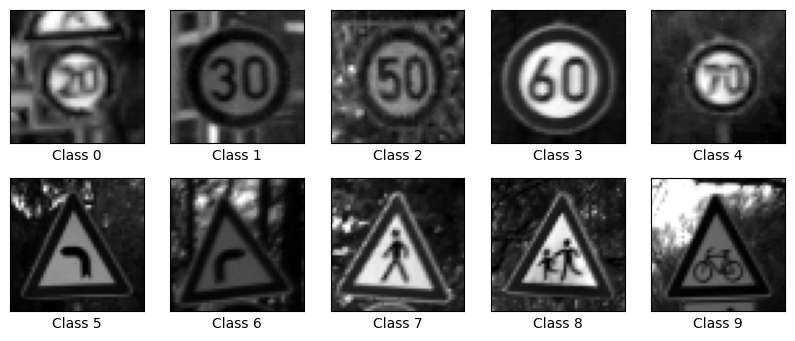

In [123]:
img_toshow = [0,210,2435,6085,7030,8275,8635,8875,9415,9685]

plt.figure(figsize=(10,4))

for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(complete_x_train.iloc[img_toshow[i]].to_numpy().reshape(48,48), cmap='gray')
    plt.xlabel("Class "+str(complete_y_train.iloc[img_toshow[i]].to_numpy()[0]))

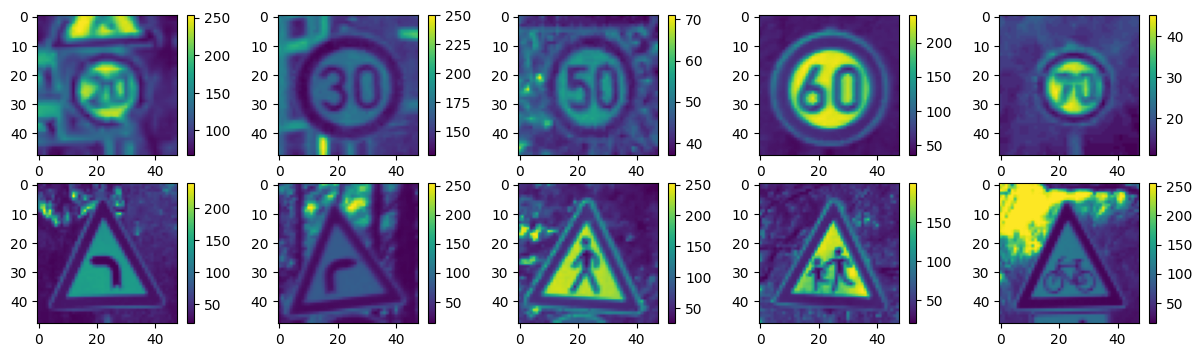

In [124]:
plt.figure(figsize=(15,4))
for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.grid(False)
    plt.imshow(complete_x_train.iloc[img_toshow[i]].to_numpy().reshape(48,48))
    plt.colorbar()
    plt.grid(False)

In [203]:
complete_y_train["0"]

0       0
1       0
2       0
3       0
4       0
       ..
9685    9
9686    9
9687    9
9688    9
9689    9
Name: 0, Length: 9690, dtype: int64

array([ 210, 2220, 2250, 1410, 1980,  210,  360,  240,  540,  270])

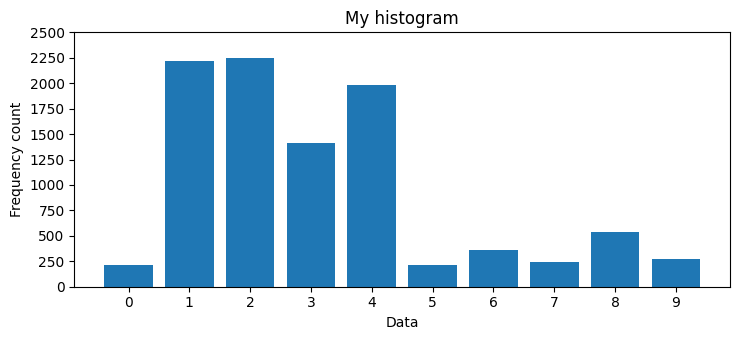

In [242]:
plt.bar(range(10),height=complete_y_train.groupby('0').value_counts().to_numpy())
plt.ylabel('Frequency count')
plt.xlabel('Data')
plt.xticks(range(10))
plt.yticks([0,250,500,750,1000,1250,1500,1750,2000,2250,2500])
plt.title('My histogram')
plt.show()

Data Preperation

Normalising the pixel values

In [126]:
complete_x_train = complete_x_train.copy().astype('float') / 255
complete_x_test = complete_x_test.copy().astype('float') / 255

Removing the noise from the data

In [127]:
def img_denoiser(arr): 
    pixel_array = arr
    reshaped_array = pixel_array.reshape((48, 48)) 
    normalized_array = np.uint8(reshaped_array * 255)
    if normalized_array.ndim != 2:
        raise ValueError("The image should have 2 dimensions") 
    thresholded_image = cv2.adaptiveThreshold(normalized_array, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresholded_image

In [128]:
complete_x_train_denoise = np.apply_along_axis(
    func1d=lambda img: img_denoiser(img),
    axis=1, arr=complete_x_train.copy()).reshape(-1, 48*48)

complete_x_test_denoise = np.apply_along_axis(
    func1d=lambda img: img_denoiser(img),
    axis=1, arr=complete_x_test.copy()).reshape(-1, 48*48)

In [129]:
complete_x_train_denoise = pd.DataFrame(complete_x_train_denoise.astype('float') / 255)
complete_x_test_denoise = pd.DataFrame(complete_x_test_denoise.astype('float') / 255)

Comparing the normal and denoised image

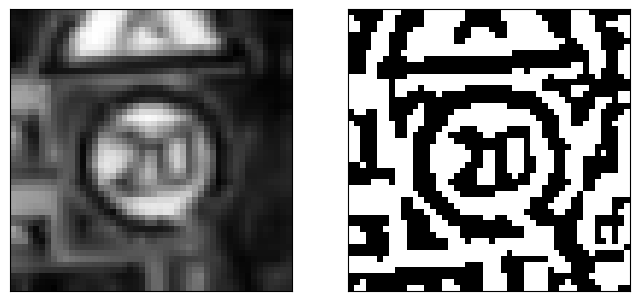

In [130]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(complete_x_train.iloc[0].to_numpy().reshape(48,48),'gray')
plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(complete_x_train_denoise.iloc[0].to_numpy().reshape(48,48),'gray')

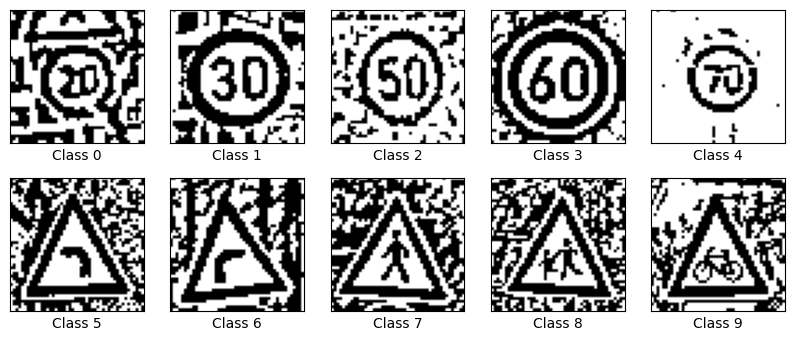

In [131]:
plt.figure(figsize=(10,4))

for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(complete_x_train_denoise.iloc[img_toshow[i]].to_numpy().reshape(48,48), cmap='gray')
    plt.xlabel("Class "+str(complete_y_train.iloc[img_toshow[i]].to_numpy()[0]))

Data Preperation for Naive Bayes Classifier

In [132]:
joined_dataset = complete_x_train_denoise.copy()
joined_dataset['class']=complete_y_train.copy()

Balancing out dataset using upper and lower stratification

In [133]:
grouped_dataset = joined_dataset.groupby('class', group_keys=False)
avg_val = int(grouped_dataset['class'].value_counts().mean())

In [134]:
balanced_dataset = pd.DataFrame()

for i in range(0,10):
    if (len(joined_dataset[joined_dataset['class']==i])<=avg_val):
        balanced_dataset = pd.concat([balanced_dataset, joined_dataset[joined_dataset['class']==i].sample(avg_val, replace=True)])
    else:
        balanced_dataset = pd.concat([balanced_dataset, joined_dataset[joined_dataset['class']==i].sample(avg_val)])

balanced_dataset_x = balanced_dataset.iloc[:,:2304]
balanced_dataset_y = balanced_dataset.iloc[:,2304:]

In [135]:
complete_y_train.groupby('0').value_counts()

0
0     210
1    2220
2    2250
3    1410
4    1980
5     210
6     360
7     240
8     540
9     270
Name: count, dtype: int64

In [136]:
balanced_dataset_y.groupby('class').value_counts()

class
0    969
1    969
2    969
3    969
4    969
5    969
6    969
7    969
8    969
9    969
Name: count, dtype: int64

Removing Outliers

In [137]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.2)
    Q3 = df.quantile(0.8)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return trueList

In [138]:
no_outlier_train = Remove_Outlier_Indices(balanced_dataset_x.copy())
no_outlier_test = Remove_Outlier_Indices(complete_x_test_denoise.copy())

In [139]:
no_outlier_dataset_train = balanced_dataset_x[no_outlier_train]
no_outlier_dataset_test = complete_x_test_denoise[no_outlier_test]

no_outlier_dataset_train = no_outlier_dataset_train.fillna(0)
no_outlier_dataset_test = no_outlier_dataset_test.fillna(0)

**Running Naive Bayes on balanced dataset**

Functions for Naive Bayes

In [140]:
def init_train_classifier(classifier, dataset_train_x, dataset_train_y):
    clf = None
    if classifier == "gaussian":
        clf = GaussianNB()
    elif classifier == "multinomial":
        clf = MultinomialNB()
    elif classifier == "complement":
        clf = ComplementNB()
    else:
        raise ValueError(f"Unknown classifier: {classifier}")
    clf.fit(dataset_train_x, dataset_train_y)
    return clf

def run_naivebayes(classifier, dataset_train_x, dataset_train_y, dataset_test_x, dataset_test_y):
    clf = init_train_classifier(classifier, dataset_train_x, dataset_train_y)
    complete_y_pred = clf.predict(dataset_test_x)
    y_score = clf.predict_proba(dataset_test_x)
    ret_arr = [
        accuracy_score(dataset_test_y, complete_y_pred), 
        precision_score(dataset_test_y, complete_y_pred, average='weighted'), 
        recall_score(dataset_test_y, complete_y_pred, average='weighted'),
        f1_score(dataset_test_y, complete_y_pred, average='weighted'),
        roc_auc_score(dataset_test_y, y_score, multi_class='ovr', average='weighted')
    ]
    return ret_arr

def get_confusion_matrix(classifier, dataset_train_x, dataset_train_y, dataset_test_x, dataset_test_y):
    clf = init_train_classifier(classifier, dataset_train_x, dataset_train_y)
    complete_y_pred = clf.predict(dataset_test_x)
    return confusion_matrix(dataset_test_y, complete_y_pred)

def get_classification_report(classifier, dataset_train_x, dataset_train_y, dataset_test_x, dataset_test_y):
    clf = init_train_classifier(classifier, dataset_train_x, dataset_train_y)
    complete_y_pred = clf.predict(dataset_test_x)
    print(classification_report(dataset_test_y, complete_y_pred))
    
def get_roc(classifier, dataset_train_x, dataset_train_y, dataset_test_x, dataset_test_y):
    clf = init_train_classifier(classifier, dataset_train_x, dataset_train_y)
    y_score = clf.predict_proba(dataset_test_x)
    n_classes = len(set(dataset_train_y))
    
    dataset_test_y_bin = label_binarize(dataset_test_y, classes=list(range(n_classes)))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(dataset_test_y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return [roc_auc, n_classes, fpr, tpr]

Using Gaussian Naive Bayes

In [141]:
conf_matrix = get_confusion_matrix('gaussian',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)
final_values = run_naivebayes('gaussian',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)

In [142]:
print("Accuracy Score : ",final_values[0])
print("Precision Score : ",final_values[1])
print("Recall Score : ",final_values[2])
print("F1 Score : ",final_values[3])
print("Area under ROC : ",final_values[4])

Accuracy Score :  0.5077669902912622
Precision Score :  0.5477188257371596
Recall Score :  0.5077669902912622
F1 Score :  0.5154976932424967
Area under ROC :  0.8260459128503337


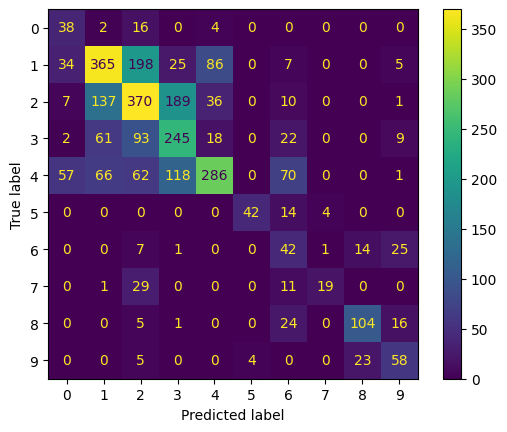

In [143]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()

In [144]:
get_classification_report('gaussian',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)

              precision    recall  f1-score   support

           0       0.28      0.63      0.38        60
           1       0.58      0.51      0.54       720
           2       0.47      0.49      0.48       750
           3       0.42      0.54      0.48       450
           4       0.67      0.43      0.52       660
           5       0.91      0.70      0.79        60
           6       0.21      0.47      0.29        90
           7       0.79      0.32      0.45        60
           8       0.74      0.69      0.71       150
           9       0.50      0.64      0.57        90

    accuracy                           0.51      3090
   macro avg       0.56      0.54      0.52      3090
weighted avg       0.55      0.51      0.52      3090



Using Multinomial Naive Bayes

In [145]:
conf_matrix = get_confusion_matrix('multinomial',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)
final_values = run_naivebayes('multinomial',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)

In [146]:
print("Accuracy Score : ",final_values[0])
print("Precision Score : ",final_values[1])
print("Recall Score : ",final_values[2])
print("F1 Score : ",final_values[3])
print("Area under ROC : ",final_values[4])

Accuracy Score :  0.4174757281553398
Precision Score :  0.48207201528801946
Recall Score :  0.4174757281553398
F1 Score :  0.4322625125382593
Area under ROC :  0.7896536219838725


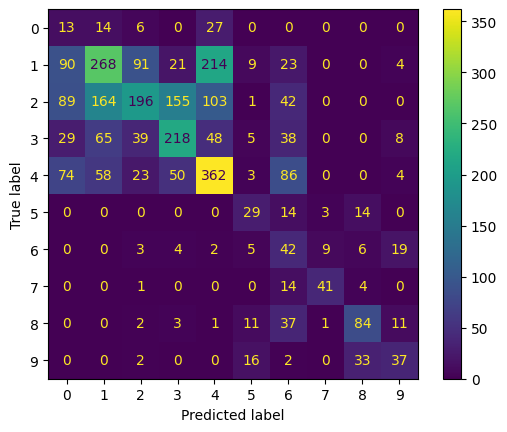

In [147]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()

In [148]:
get_classification_report('multinomial',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)

              precision    recall  f1-score   support

           0       0.04      0.22      0.07        60
           1       0.47      0.37      0.42       720
           2       0.54      0.26      0.35       750
           3       0.48      0.48      0.48       450
           4       0.48      0.55      0.51       660
           5       0.37      0.48      0.42        60
           6       0.14      0.47      0.22        90
           7       0.76      0.68      0.72        60
           8       0.60      0.56      0.58       150
           9       0.45      0.41      0.43        90

    accuracy                           0.42      3090
   macro avg       0.43      0.45      0.42      3090
weighted avg       0.48      0.42      0.43      3090



Using Complement Naive Bayes

In [149]:
conf_matrix = get_confusion_matrix('complement',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)
final_values = run_naivebayes('complement',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)

In [150]:
print("Accuracy Score : ",final_values[0])
print("Precision Score : ",final_values[1])
print("Recall Score : ",final_values[2])
print("F1 Score : ",final_values[3])
print("Area under ROC : ",final_values[4])

Accuracy Score :  0.35080906148867314
Precision Score :  0.5189987864062425
Recall Score :  0.35080906148867314
F1 Score :  0.37005567058046696
Area under ROC :  0.7763938929537909


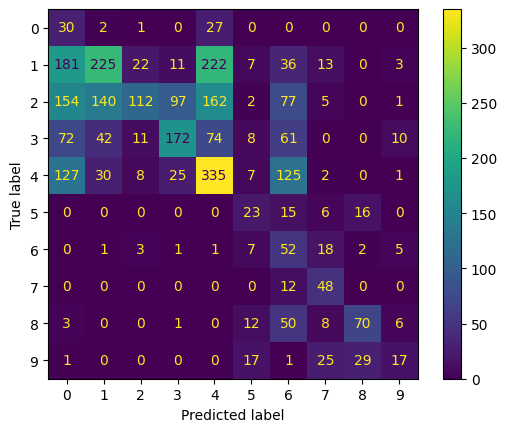

In [151]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()

In [152]:
get_classification_report('complement',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)

              precision    recall  f1-score   support

           0       0.05      0.50      0.10        60
           1       0.51      0.31      0.39       720
           2       0.71      0.15      0.25       750
           3       0.56      0.38      0.45       450
           4       0.41      0.51      0.45       660
           5       0.28      0.38      0.32        60
           6       0.12      0.58      0.20        90
           7       0.38      0.80      0.52        60
           8       0.60      0.47      0.52       150
           9       0.40      0.19      0.26        90

    accuracy                           0.35      3090
   macro avg       0.40      0.43      0.35      3090
weighted avg       0.52      0.35      0.37      3090



ROC Curve for the different classes

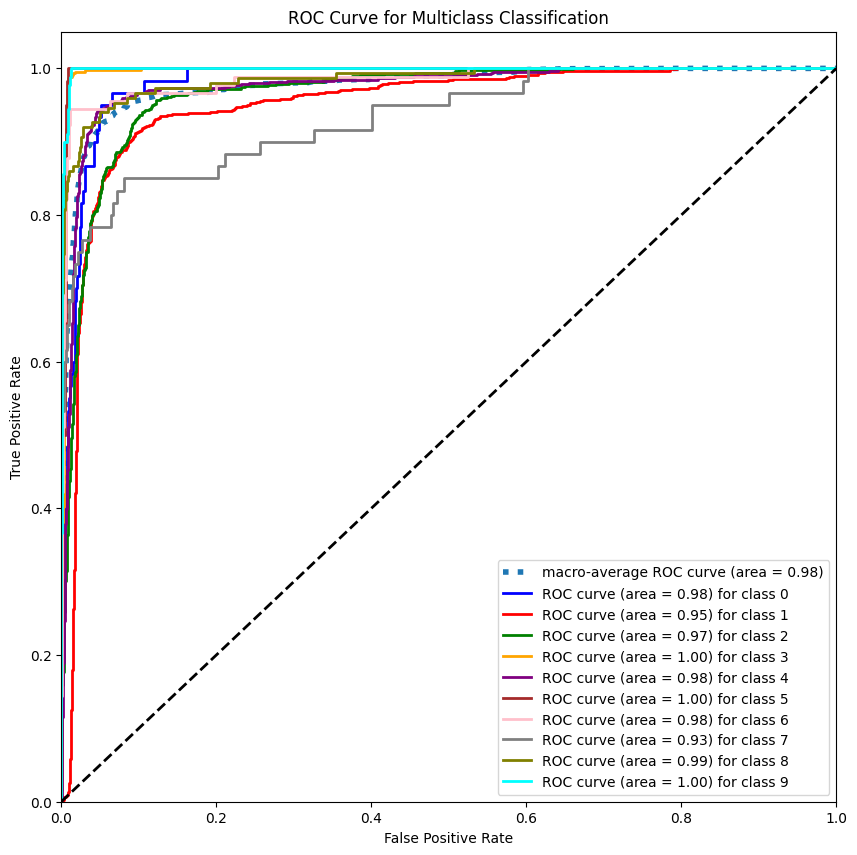

In [153]:
y_test_binarized = label_binarize(complete_y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_binarized.shape[1]

classifier = OneVsRestClassifier(LogisticRegression()) 
y_score = classifier.fit(complete_x_train, complete_y_train).decision_function(complete_x_test)

fpr=dict()
tpr=dict() 
roc_auc=dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(10)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(10):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 10  # assuming 10 classes

# Calculate macro-average ROC AUC
roc_auc_macro = auc(all_fpr, mean_tpr)

#Plot ROC curve 
plt.figure(figsize=(10,10))
plt.plot(all_fpr, mean_tpr, label=f'macro-average ROC curve (area = {roc_auc_macro:0.2f})', linestyle=':', linewidth=4)

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=2) #dashed line represents the diagonal (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

**Extracting Top Features using correlation**

In [154]:
class_arr_data = [
                onevsall_y_train_0.copy(),
                onevsall_y_train_1.copy(),
                onevsall_y_train_2.copy(),
                onevsall_y_train_3.copy(),
                onevsall_y_train_4.copy(),
                onevsall_y_train_5.copy(),
                onevsall_y_train_6.copy(),
                onevsall_y_train_7.copy(),
                onevsall_y_train_8.copy(),
                onevsall_y_train_9.copy()
            ]

x_data = complete_x_train_denoise.copy()

Function to get Top Features

In [155]:
def topFeatureExtractionMethod1(x,dataset,arr):
    return_arr = []
    for i in arr:
        bestfeatures = SelectKBest(score_func=chi2, k=x//len(arr))
        fit = bestfeatures.fit(dataset,i)
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(dataset.columns)
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score']
        return_arr = np.unique(np.concatenate((return_arr,featureScores.nlargest(x//len(arr),'Score')['Specs']),0))
    return return_arr

In [156]:
def topFeatureExtractionMethod2(x,dataset,arr):
    features_array = [[]]*10
    return_arr = [[]]*3
    for i in range (0,len(arr)):
        bestfeatures = SelectKBest(score_func=chi2, k=x//len(arr))
        fit = bestfeatures.fit(dataset,arr[i])
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(dataset.columns)
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score']
        features_array[i]=featureScores.nlargest(x//len(arr),'Score')['Specs']
    for i in range (0,10):
        return_arr[0] = np.unique(np.concatenate((return_arr[0], features_array[i][0:x//len(arr)]),0))
        return_arr[1] = np.unique(np.concatenate((return_arr[1], features_array[i][0:x//(len(arr)*2)]),0))
        return_arr[2] = np.unique(np.concatenate((return_arr[2], features_array[i][0:x//(len(arr)*4)]),0))
    return return_arr

Spliting Datasets based on top features

In [157]:
dataset1_method1 = topFeatureExtractionMethod1(400,x_data,class_arr_data)
dataset2_method1 = topFeatureExtractionMethod1(180,x_data,class_arr_data)
dataset3_method1 = topFeatureExtractionMethod1(70,x_data,class_arr_data)

dataset1_method1 = [int(i) for i in dataset1_method1]
dataset2_method1 = [int(i) for i in dataset2_method1]
dataset3_method1 = [int(i) for i in dataset3_method1]

datasets_method2 = topFeatureExtractionMethod2(500,x_data,class_arr_data)
dataset1_method2 = [int(i) for i in datasets_method2[0]]
dataset2_method2 = [int(i) for i in datasets_method2[1]]
dataset3_method2 = [int(i) for i in datasets_method2[2]]

In [158]:
datasets = [
    [(no_outlier_dataset_train[dataset1_method1], no_outlier_dataset_test[dataset1_method1]), 
     (no_outlier_dataset_train[dataset2_method1], no_outlier_dataset_test[dataset2_method1]), 
     (no_outlier_dataset_train[dataset3_method1], no_outlier_dataset_test[dataset3_method1])],
    [(no_outlier_dataset_train[dataset1_method2], no_outlier_dataset_test[dataset1_method2]), 
     (no_outlier_dataset_train[dataset2_method2], no_outlier_dataset_test[dataset2_method2]), 
     (no_outlier_dataset_train[dataset3_method2], no_outlier_dataset_test[dataset3_method2])]
]

bayes = ["gaussian", "multinomial", "complement"]

for i in range (0,len(datasets)):
    print("*"*100)
    print("Using Method ",i+1)
    print("*"*100)
    for j in range (0,len(datasets[i])):
        print("Dataset",i+1,"Method",j+1) 
        for k in range (0,len(bayes)):
            temp = run_naivebayes(bayes[k], datasets[i][j][0], balanced_dataset_y, datasets[i][j][1], complete_y_test)
            print("\t",bayes[k].capitalize(),"Naive Bayes","\n\t\tAccuracy :",temp[0],"\n\t\tPrecision :",temp[1],"\n\t\tRecall Score :",temp[2],"\n\t\tF1 Score :",temp[3],"\n\t\tArea under ROC :",temp[4])

****************************************************************************************************
Using Method  1
****************************************************************************************************
Dataset 1 Method 1
	 Gaussian Naive Bayes 
		Accuracy : 0.7498381877022654 
		Precision : 0.7777281549127125 
		Recall Score : 0.7498381877022654 
		F1 Score : 0.7536055961608392 
		Area under ROC : 0.9430079621632446
	 Multinomial Naive Bayes 
		Accuracy : 0.7113268608414239 
		Precision : 0.7427024781132171 
		Recall Score : 0.7113268608414239 
		F1 Score : 0.7188949329875927 
		Area under ROC : 0.9293775724679495
	 Complement Naive Bayes 
		Accuracy : 0.6122977346278318 
		Precision : 0.7402295035505977 
		Recall Score : 0.6122977346278318 
		F1 Score : 0.6506820573004712 
		Area under ROC : 0.8923174440757403
Dataset 1 Method 2
	 Gaussian Naive Bayes 
		Accuracy : 0.7365695792880259 
		Precision : 0.7591734905823605 
		Recall Score : 0.7365695792880259 
		F1 Score : 0

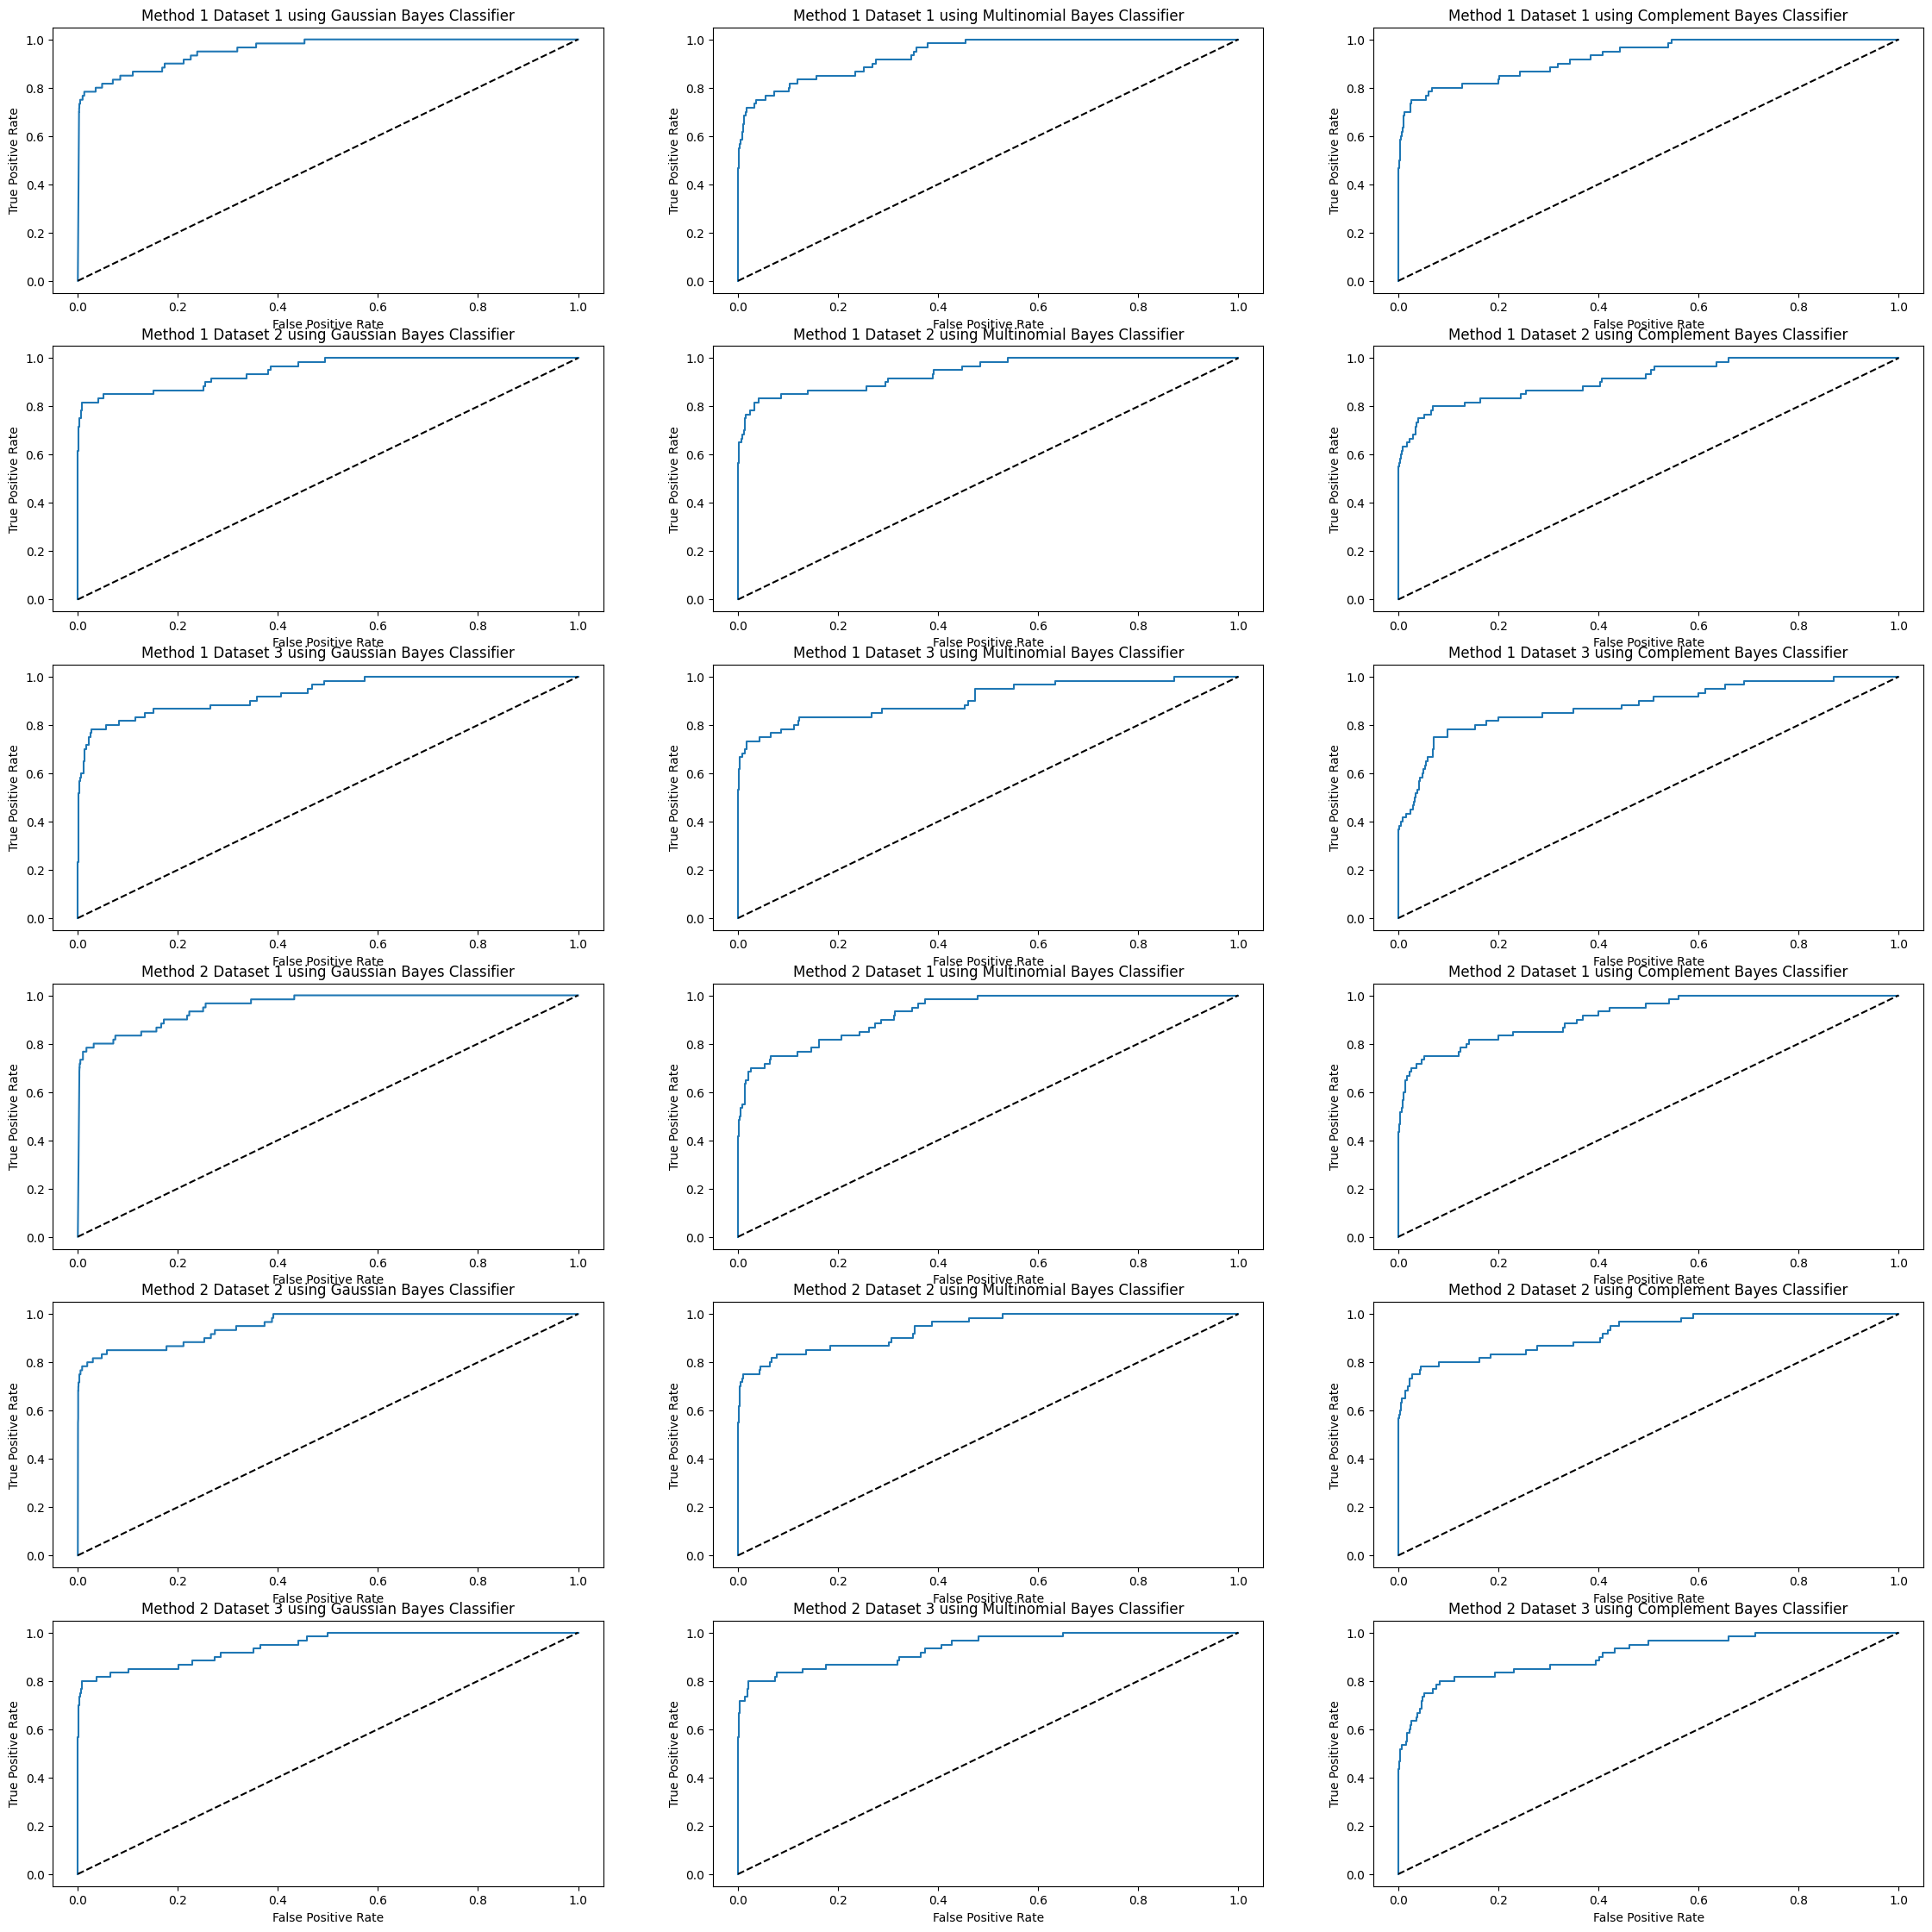

In [159]:
fig, axes = plt.subplots(6,3,figsize=(28,28))
t = 0
for i in range (0,len(datasets)):
    for j in range (0,len(datasets[i])):
        for k in range (0,len(bayes)):
            valuesS = get_roc(bayes[k], datasets[i][j][0], balanced_dataset_y, datasets[i][j][1], complete_y_test)
            for l in range(valuesS[1]):
                axes[t,k].plot(valuesS[2][l], valuesS[3][l],label=f'ROC curve of class {l} (area = {valuesS[0][l]:0.2f})')
            axes[t,k].plot([0, 1], [0, 1], 'k--')
            axes[t,k].set_title("Method "+str(i+1)+" Dataset "+str(j+1)+" using "+bayes[k].capitalize()+" Bayes Classifier")
            axes[t,k].set_ylabel('True Positive Rate')
            axes[t,k].set_xlabel('False Positive Rate')
        t += 1

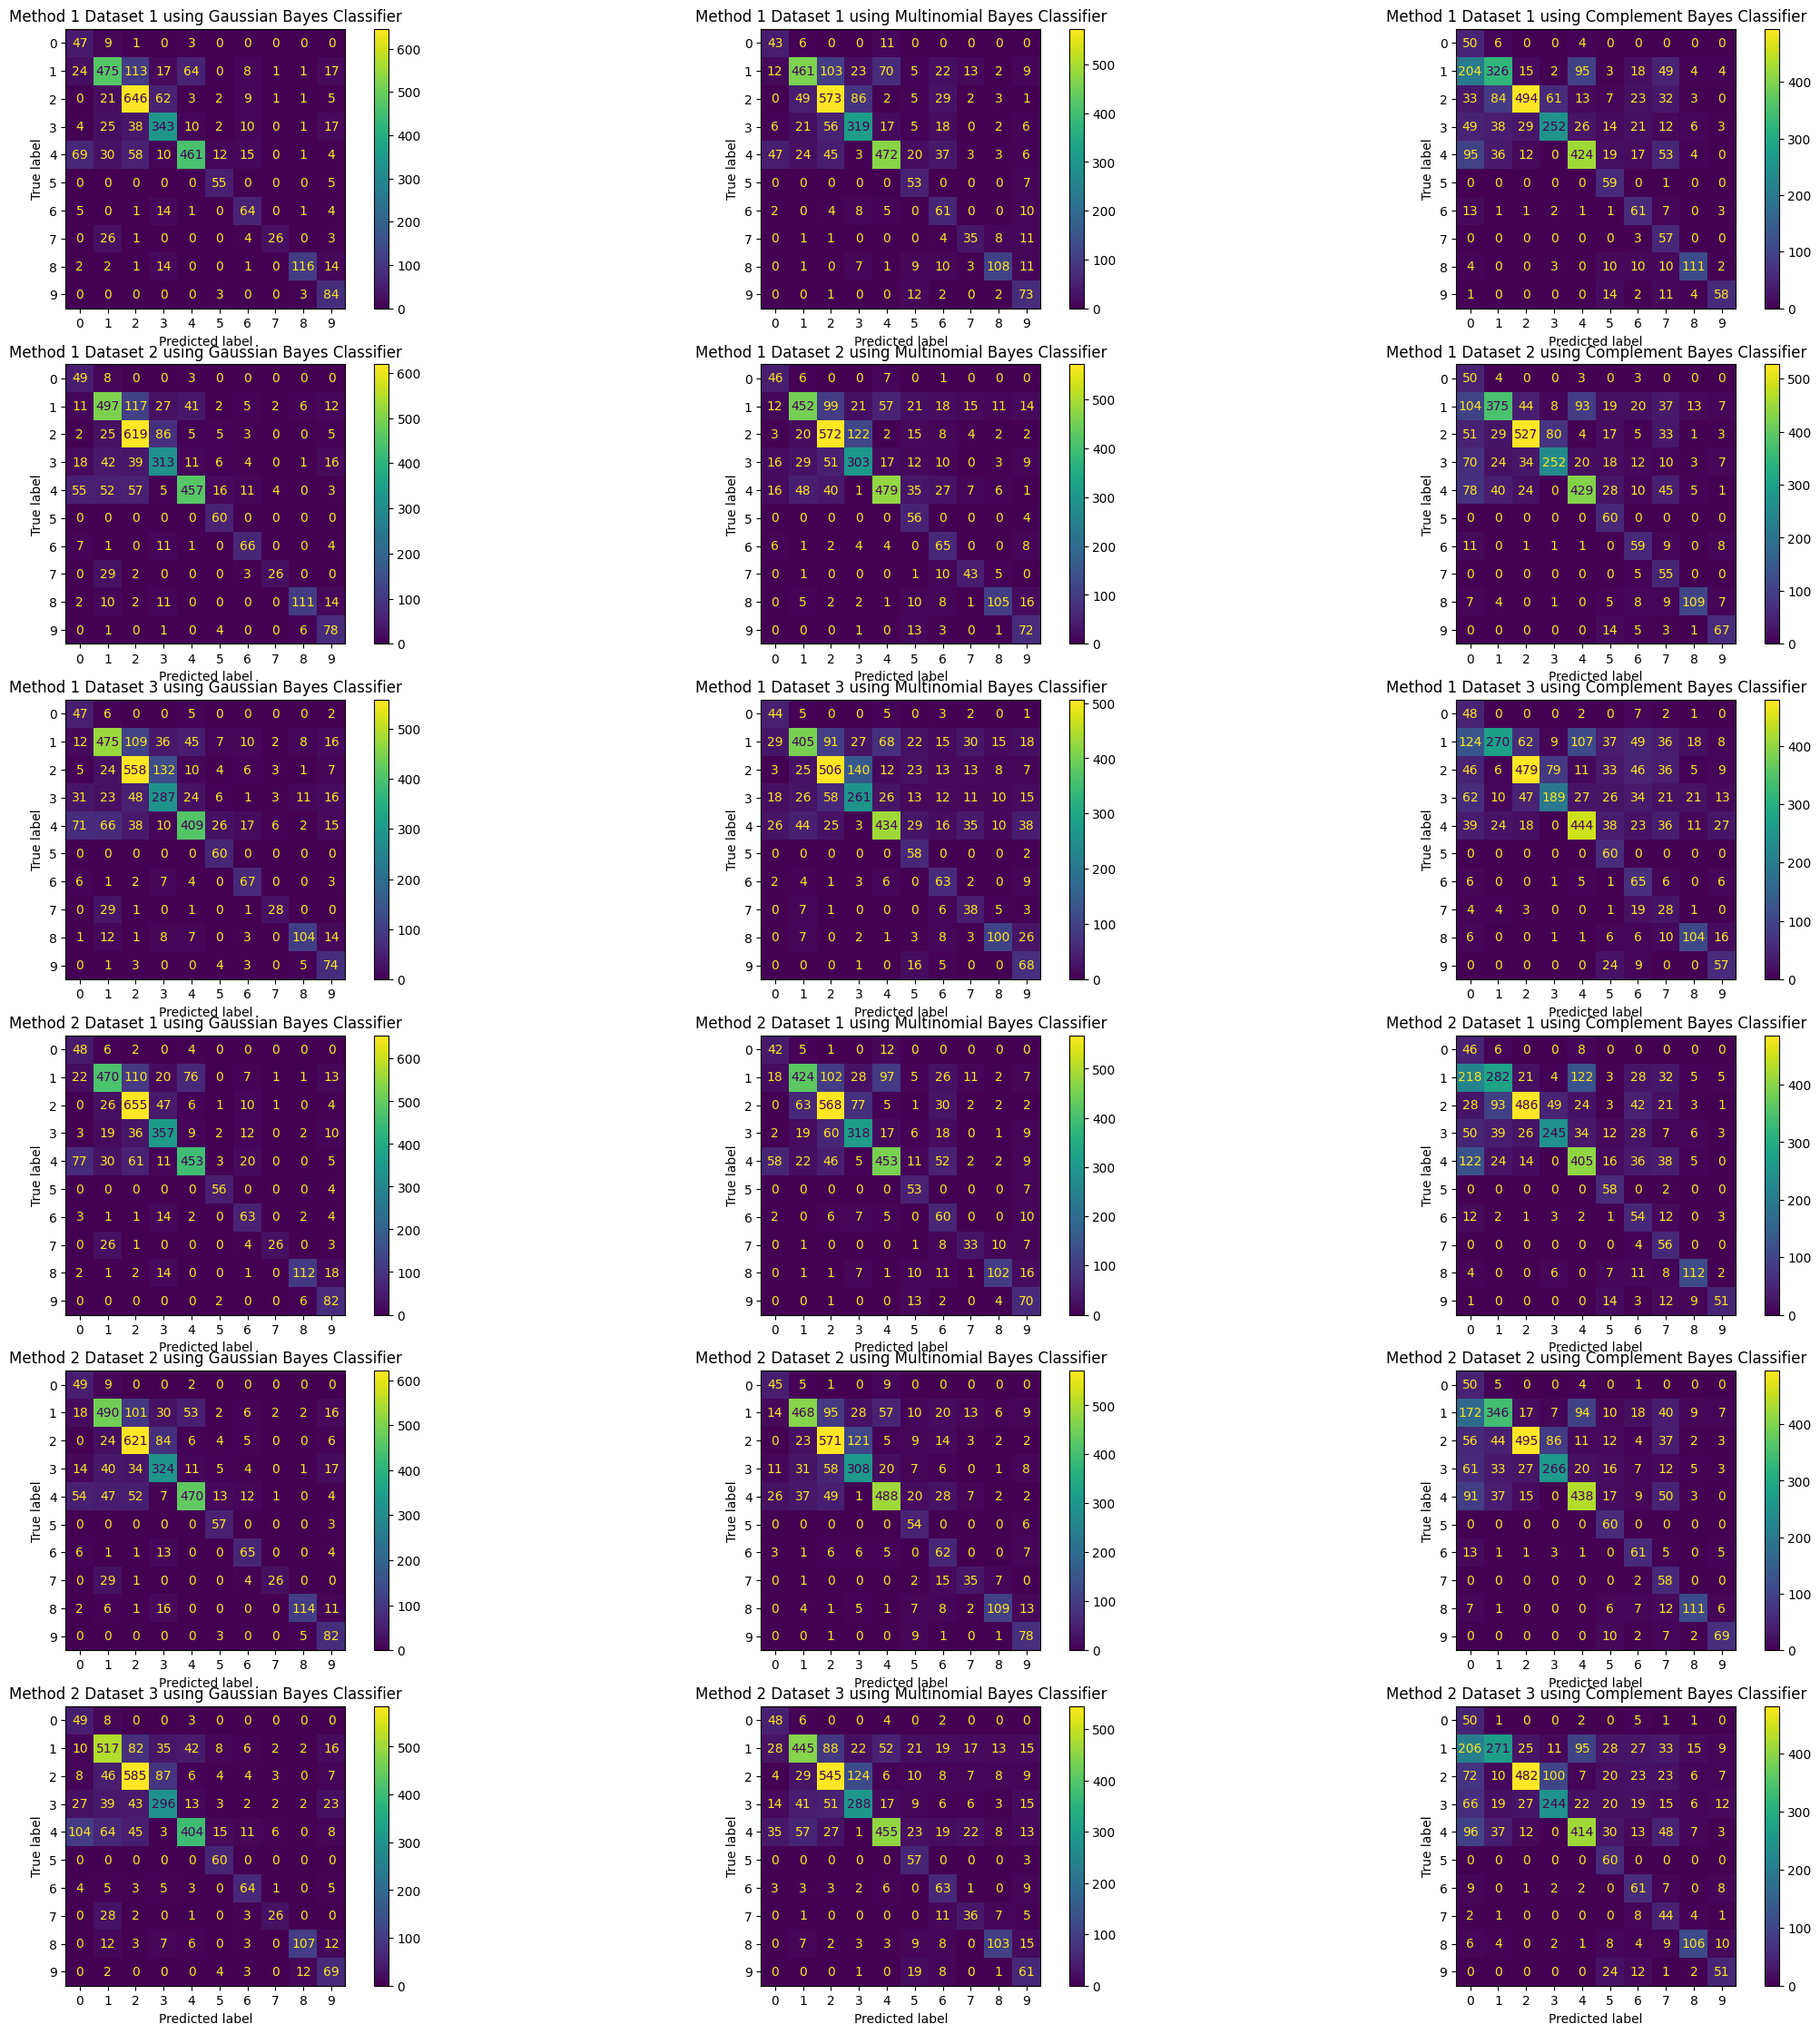

In [160]:
fig, axes = plt.subplots(6,3,figsize=(28,28))
t = 0
for i in range (0,len(datasets)):
    for j in range (0,len(datasets[i])):
        for k in range (0,len(bayes)):
            valuesS = get_confusion_matrix(bayes[k], datasets[i][j][0], balanced_dataset_y, datasets[i][j][1], complete_y_test)
            cm_display = ConfusionMatrixDisplay(valuesS)
            cm_display.plot(ax=axes[t,k])
            axes[t,k].set_title("Method "+str(i+1)+" Dataset "+str(j+1)+" using "+bayes[k].capitalize()+" Bayes Classifier")

        t += 1

<Figure size 1200x600 with 0 Axes>

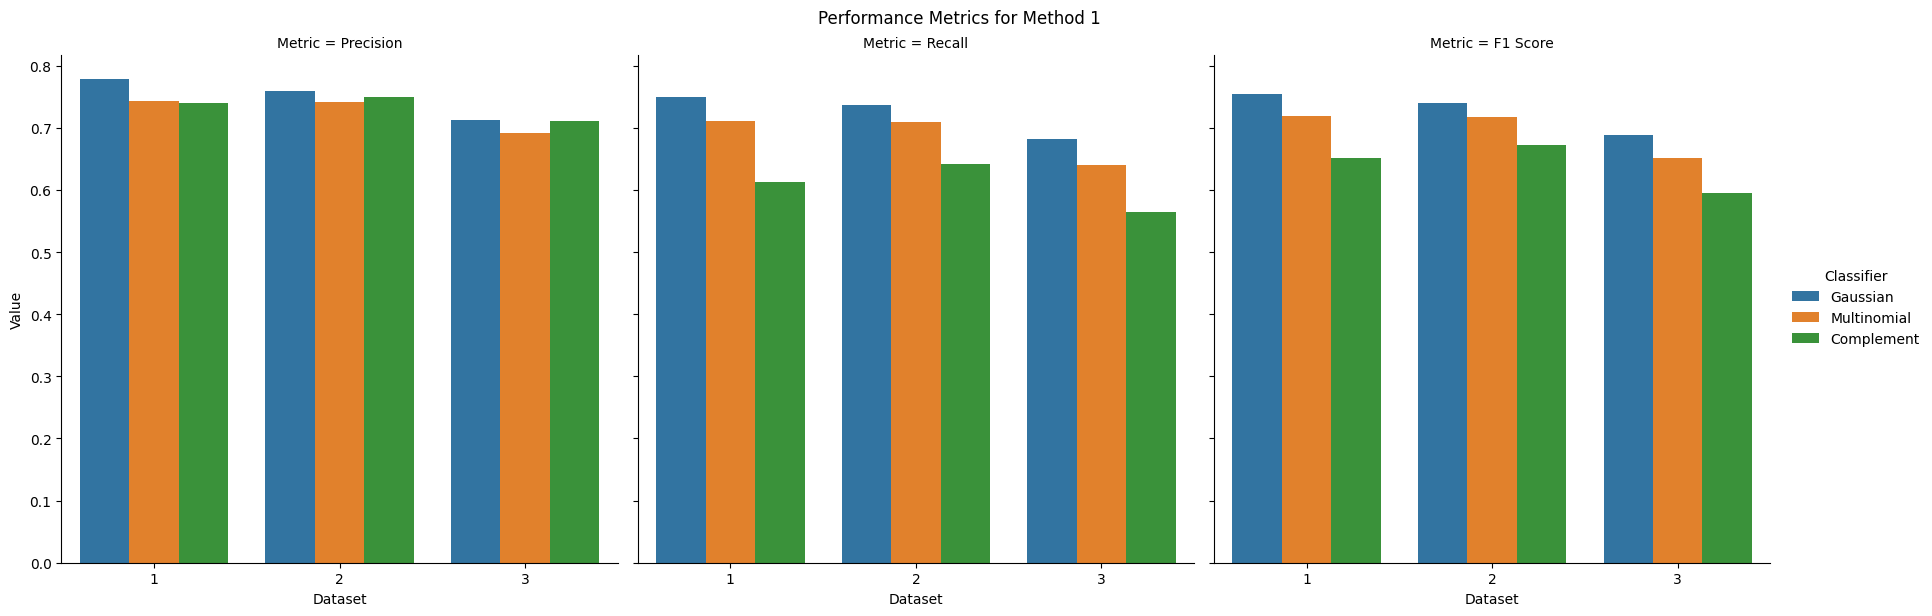

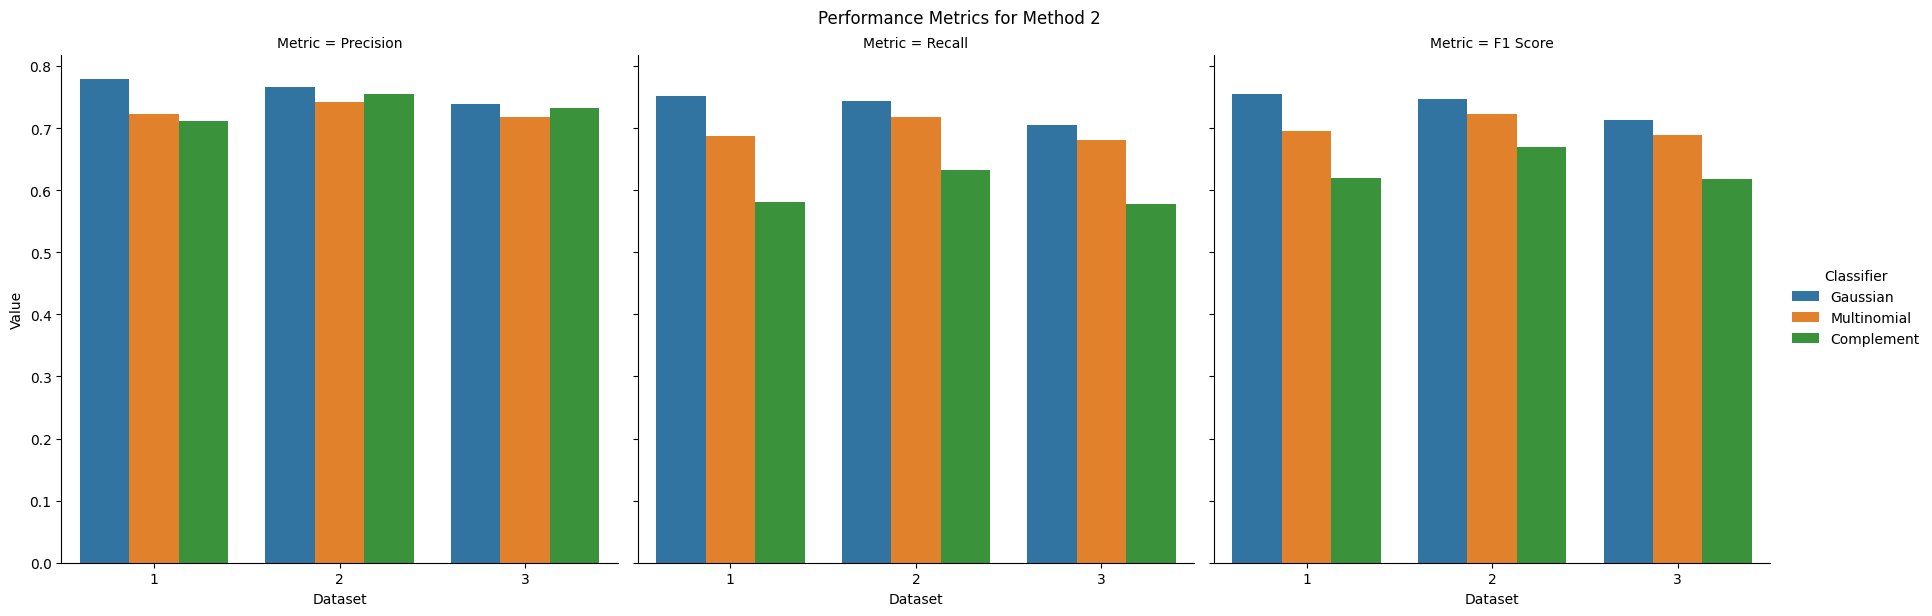

In [161]:
data_rows = []

for i in range(len(datasets)):
    method_num = i + 1
    for j in range(len(datasets[i])):
        dataset_num = j + 1
        for k in range(len(bayes)):
            classifier_name = bayes[k].capitalize()
            temp = run_naivebayes(bayes[k], datasets[i][j][0], balanced_dataset_y, datasets[i][j][1], complete_y_test)
            row_dict = {
                'Method': method_num,
                'Dataset': dataset_num,
                'Classifier': classifier_name,
                'Accuracy': temp[0],
                'Precision': temp[1],
                'Recall': temp[2],
                'F1 Score': temp[3]
            }
            data_rows.append(row_dict)

results_df = pd.DataFrame(data_rows)

melted_df = results_df.melt(id_vars=['Method', 'Dataset', 'Classifier'], value_vars=['Precision', 'Recall', 'F1 Score'], 
                            var_name='Metric', value_name='Value')

plt.figure(figsize=(12,6))

sns.catplot(data=melted_df[melted_df['Method'] == 1], x='Dataset', y='Value', hue='Classifier', col='Metric', kind='bar', height=6, aspect=1)
plt.suptitle('Performance Metrics for Method 1', y=1.02)
plt.show()

sns.catplot(data=melted_df[melted_df['Method'] == 2], x='Dataset', y='Value', hue='Classifier', col='Metric', kind='bar', height=6, aspect=1)
plt.suptitle('Performance Metrics for Method 2', y=1.02)
plt.show()

<Figure size 1500x700 with 0 Axes>

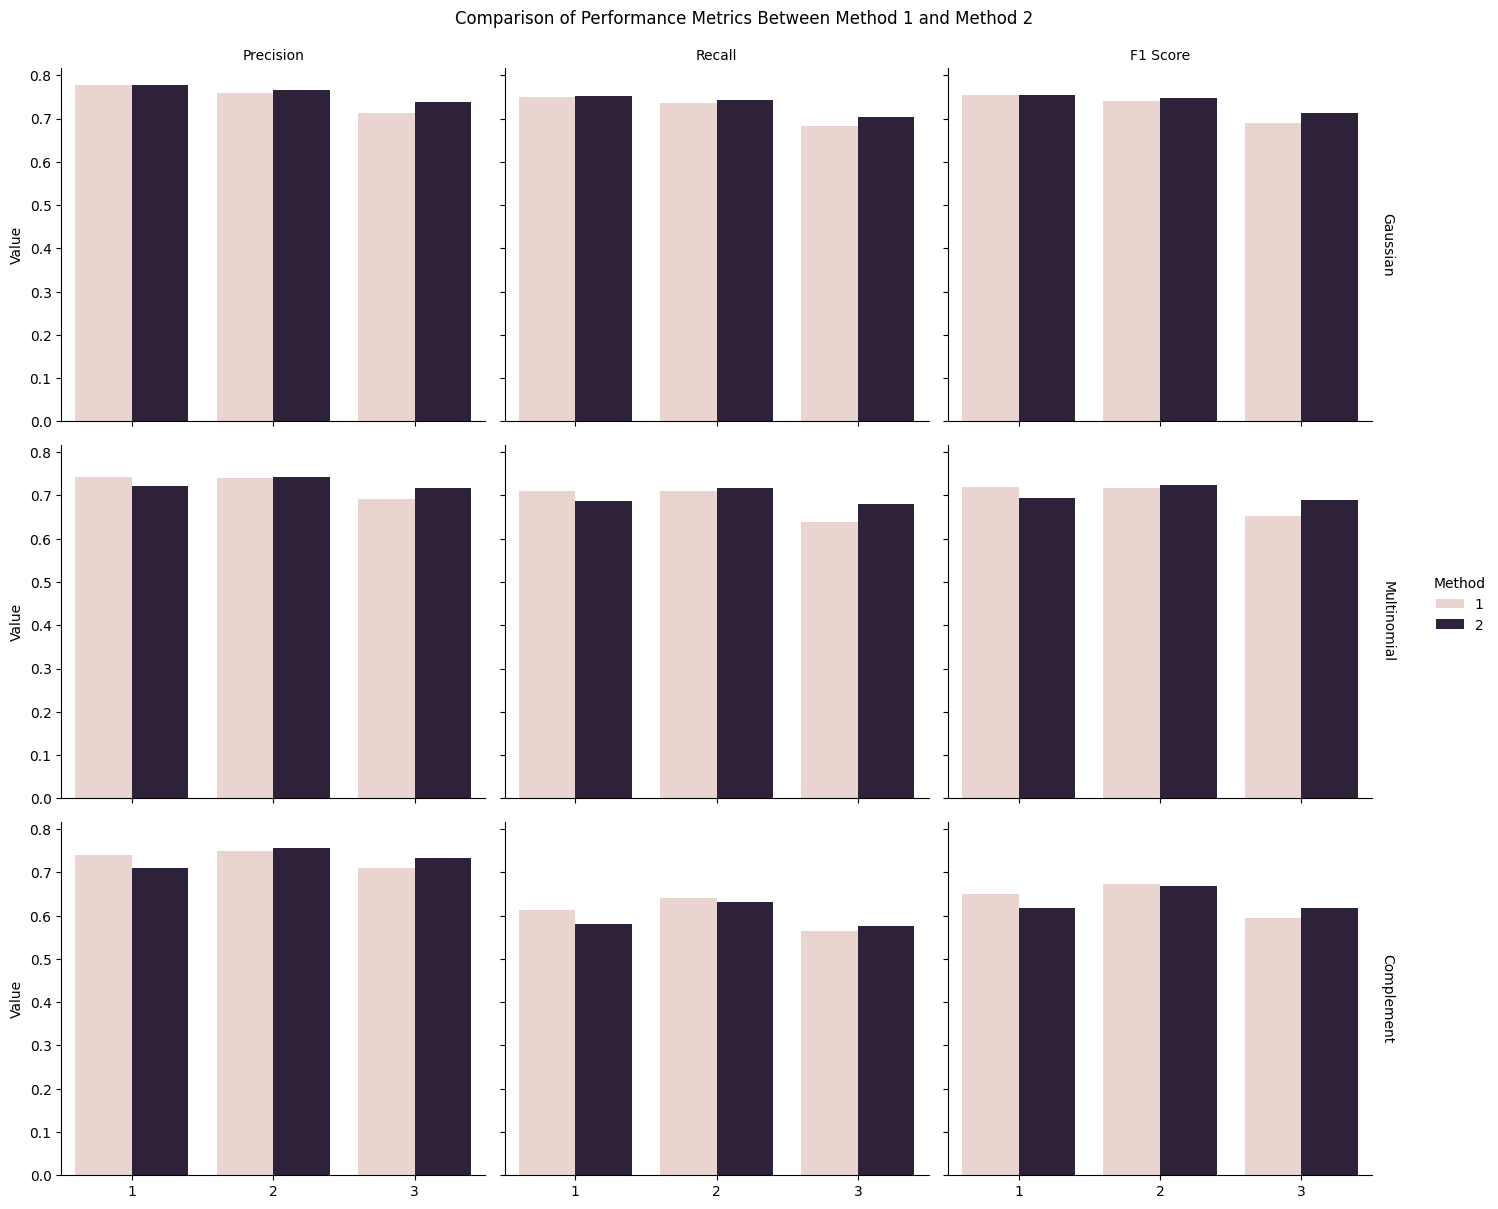

In [162]:
plt.figure(figsize=(15,7))

g = sns.catplot(
    data=melted_df, 
    x='Dataset', 
    y='Value', 
    hue='Method', 
    col='Metric', 
    row='Classifier', 
    kind='bar', 
    height=4, 
    aspect=1.2, 
    margin_titles=True
)

g.fig.suptitle('Comparison of Performance Metrics Between Method 1 and Method 2', y=1.02)
g.set_axis_labels("", "Value")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.show()